In [40]:
import networkx as nx
import numpy as np
import scipy as sc
import os
import re

import util

def get_node_map():
    activities = """0	O
    1	C
    2	N
    3	F
    4	Cl
    5	S
    6	Br
    7	Si
    8	Na
    9	I
    10	Hg
    11	B
    12	K
    13	P
    14	Au
    15	Cr
    16	Sn
    17	Ca
    18	Cd
    19	Zn
    20	V
    21	As
    22	Li
    23	Cu
    24	Co
    25	Ag
    26	Se
    27	Pt
    28	Al
    29	Bi
    30	Sb
    31	Ba
    32	Fe
    33	H
    34	Ti
    35	Tl
    36	Sr
    37	In
    38	Dy
    39	Ni
    40	Be
    41	Mg
    42	Nd
    43	Pd
    44	Mn
    45	Zr
    46	Pb
    47	Yb
    48	Mo
    49	Ge
    50	Ru
    51	Eu
    52	Sc
    53	Gd"""

    node_map = {i.split('\t')[0].strip() : i.split('\t')[1].strip() for i in activities.split("\n")}

    return node_map

def read_graphfile_viz(datadir, dataname, max_nodes=None):
    prefix = os.path.join(datadir, dataname, dataname)
    filename_graph_indic = prefix + '_graph_indicator.txt'
    graph_indic={}
    with open(filename_graph_indic) as f:
        i=1
        for line in f:
            line=line.strip("\n")
            graph_indic[i]=int(line)
            i+=1

    filename_nodes=prefix + '_node_labels.txt'
    node_labels=[]
    
    node_map = get_node_map()
    print(f"node map: {node_map}")
    
    try:
        with open(filename_nodes) as f:
            for line in f:
                line=line.strip("\n")
#                 print(line)
#                 node_labels+=[int(line) - 1]
                # node_labels += node_map.get(line)
                node_labels += line
#         print(node_labels)
        num_unique_node_labels = len(set(node_labels))
    except IOError:
        print('No node labels')
 
    filename_node_attrs=prefix + '_node_attributes.txt'
    node_attrs=[]
    try:
        with open(filename_node_attrs) as f:
            for line in f:
                line = line.strip("\s\n")
                attrs = [float(attr) for attr in re.split("[,\s]+", line) if not attr == '']
                node_attrs.append(np.array(attrs))
    except IOError:
        print('No node attributes')
       
    label_has_zero = False
    filename_graphs=prefix + '_graph_labels.txt'
    graph_labels=[]

    label_vals = []
    with open(filename_graphs) as f:
        for line in f:
            line=line.strip("\n")
            val = int(line)
            if val not in label_vals:
                label_vals.append(val)
            graph_labels.append(val)

    label_map_to_int = {val: i for i, val in enumerate(label_vals)}
    graph_labels = np.array([label_map_to_int[l] for l in graph_labels])

    filename_adj=prefix + '_A.txt'
    adj_list={i:[] for i in range(1,len(graph_labels)+1)}    
    index_graph={i:[] for i in range(1,len(graph_labels)+1)}
    num_edges = 0
    with open(filename_adj) as f:
        for line in f:
            line=line.strip("\n").split(",")
            e0,e1=(int(line[0].strip(" ")),int(line[1].strip(" ")))
            adj_list[graph_indic[e0]].append((e0,e1))
            index_graph[graph_indic[e0]]+=[e0,e1]
            num_edges += 1
    for k in index_graph.keys():
        index_graph[k]=[u-1 for u in set(index_graph[k])]
    
    
    graphs=[]
    for i in range(1,1+len(adj_list)):
        G=nx.from_edgelist(adj_list[i])
        G.graph['label'] = graph_labels[i-1]
        for u in util.node_iter(G):
            if len(node_labels) > 0:
                # node_label_one_hot = { node_lbl: 0 for node_lbl in range(num_unique_node_labels)}
                node_label = node_labels[u-1]
                # node_label_one_hot[node_label] = 1
                util.node_dict(G)[u]['label'] = node_label
            if len(node_attrs) > 0:
                util.node_dict(G)[u]['feat'] = node_attrs[u-1]
        if len(node_attrs) > 0:
            G.graph['feat_dim'] = node_attrs[0].shape[0]
        # print(node_labels)
        print(G.nodes())
        print(G.edges())
        # print(G.get get_node_attribute('label'))
        # nx.draw(G, with_labels=True)
        
        mapping={}
        for n in util.node_iter(G):
            mapping[n]= node_map.get(G.nodes[n]['label'])
        graphs.append(nx.relabel_nodes(G, mapping))

        # node_label_mapping = {}
        nx.draw(G, labels = mapping, with_labels=True)
        break
    return graphs

node map: {'0': 'O', '1': 'C', '2': 'N', '3': 'F', '4': 'Cl', '5': 'S', '6': 'Br', '7': 'Si', '8': 'Na', '9': 'I', '10': 'Hg', '11': 'B', '12': 'K', '13': 'P', '14': 'Au', '15': 'Cr', '16': 'Sn', '17': 'Ca', '18': 'Cd', '19': 'Zn', '20': 'V', '21': 'As', '22': 'Li', '23': 'Cu', '24': 'Co', '25': 'Ag', '26': 'Se', '27': 'Pt', '28': 'Al', '29': 'Bi', '30': 'Sb', '31': 'Ba', '32': 'Fe', '33': 'H', '34': 'Ti', '35': 'Tl', '36': 'Sr', '37': 'In', '38': 'Dy', '39': 'Ni', '40': 'Be', '41': 'Mg', '42': 'Nd', '43': 'Pd', '44': 'Mn', '45': 'Zr', '46': 'Pb', '47': 'Yb', '48': 'Mo', '49': 'Ge', '50': 'Ru', '51': 'Eu', '52': 'Sc', '53': 'Gd'}
[2, 1, 6, 20, 3, 14, 4, 21, 5, 7, 11, 22, 8, 12, 9, 10, 23, 24, 13, 25, 15, 19, 16, 26, 17, 27, 18, 28, 29, 30]
[(2, 1), (2, 3), (2, 14), (1, 6), (1, 20), (6, 5), (6, 22), (3, 4), (3, 21), (4, 5), (4, 7), (5, 11), (7, 8), (7, 12), (11, 10), (11, 25), (8, 9), (12, 15), (12, 19), (9, 10), (9, 23), (9, 24), (10, 13), (15, 16), (15, 26), (19, 18), (19, 30), (16, 1

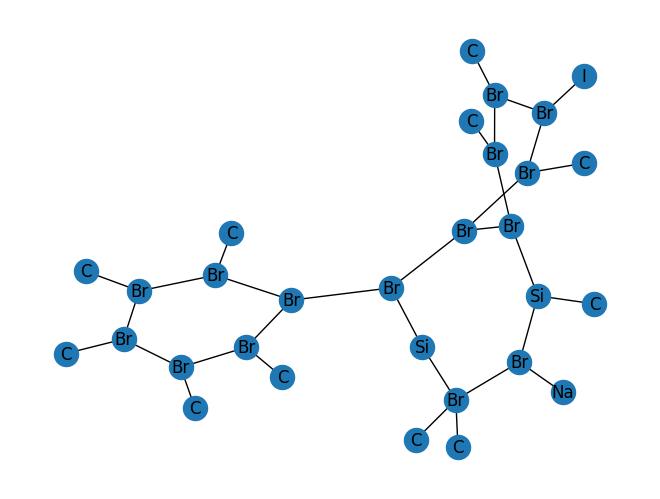

In [41]:
node_map = get_node_map()
graphs = read_graphfile_viz('dataset', dataname='BZR')

In [31]:
G = graphs[0].copy()

for n1 in list(G.nodes(data=True)):
    print(n1)

(0, {'label': '6', 'feat': array([-2.852647,  1.135103,  0.232223])})
(1, {'label': '6', 'feat': array([-2.626347,  2.492403,  0.061623])})
(2, {'label': '6', 'feat': array([-1.322147,  2.983803,  0.126723])})
(3, {'label': '1', 'feat': array([-3.461647,  3.166003, -0.108177])})
(4, {'label': '6', 'feat': array([-1.797347,  0.253903,  0.431023])})
(5, {'label': '9', 'feat': array([-4.105647,  0.663503,  0.183523])})
(6, {'label': '6', 'feat': array([-0.478447,  0.736203,  0.471223])})
(7, {'label': '1', 'feat': array([-2.017747, -0.805197,  0.532223])})
(8, {'label': '6', 'feat': array([-0.243547,  2.120703,  0.374723])})
(9, {'label': '6', 'feat': array([ 0.635753, -0.266097,  0.495323])})
(10, {'label': '7', 'feat': array([1.017053, 2.729703, 0.501023])})
(11, {'label': '1', 'feat': array([-1.162547,  4.055603,  0.018323])})
(12, {'label': '7', 'feat': array([ 1.717953, -0.166297,  1.197523])})
(13, {'label': '6', 'feat': array([ 0.514253, -1.480097, -0.375177])})
(14, {'label': '6',